# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina'

In [6]:
#imports dataset with all the birthplaces
place= pd.read_csv('/users/atoliver/ds_1300_notebooks/work/project/NBA_Demographics.csv')
birthplace=place[['Player', 'City', 'Region']]

In [7]:
birthplace['Player'] = birthplace['Player'].str.replace('[^\w\s]','')

/tmp/ipykernel_4025/877996602.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  birthplace['Player'] = birthplace['Player'].str.replace('[^\w\s]','')
/tmp/ipykernel_4025/877996602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birthplace['Player'] = birthplace['Player'].str.replace('[^\w\s]','')


In [8]:
#imports rank dataset
rank= pd.read_csv('/users/atoliver/ds_1300_notebooks/work/project/PER_Ranking.csv')
ranks=rank[['Rk','Player']]

In [9]:
Names=ranks['Player'].str.split(pat = '\\', expand = True) #splits the ID number to dif column
Names['Rk']=ranks['Rk']
Names.columns=['Player_','ID','Rk']
Names=Names.reindex(columns=['Rk','Player_','ID'])
Names.drop('ID', axis = 1, inplace = True) #drops the ID number bc not necessary

In [10]:
#merges so have rank, player, and birthplace in same dataframe
total=Names.merge(birthplace,left_on='Player_', right_on='Player')

In [11]:
nba_states = pd.DataFrame(total['Region'].value_counts()) #might need to make another column that counts the rows
NBAstates=nba_states.reset_index()
NBAstates.columns=['State','StateTotal']

In [13]:
import geopandas

In [14]:
usa = geopandas.read_file('/users/atoliver/ds_1300_notebooks/work/project/cb_2018_us_state_5m.shp')

In [15]:
#removing territories
USA=usa[(usa['NAME']!=('Puerto Rico'))&(usa['NAME']!=('American Samoa'))&(usa['NAME']!=('Guam'))&(usa['NAME']!=('Commonwealth of the Northern Mariana Islands'))&(usa['NAME']!=('United States Virgin Islands'))&(usa['NAME']!=('Alaska'))&(usa['NAME']!=('Hawaii'))]

In [16]:
#combining the US state geometry data and the state total data
merged = pd.merge(NBAstates,USA, left_on='State', right_on='NAME', how='outer')
gdf=geopandas.GeoDataFrame(merged)

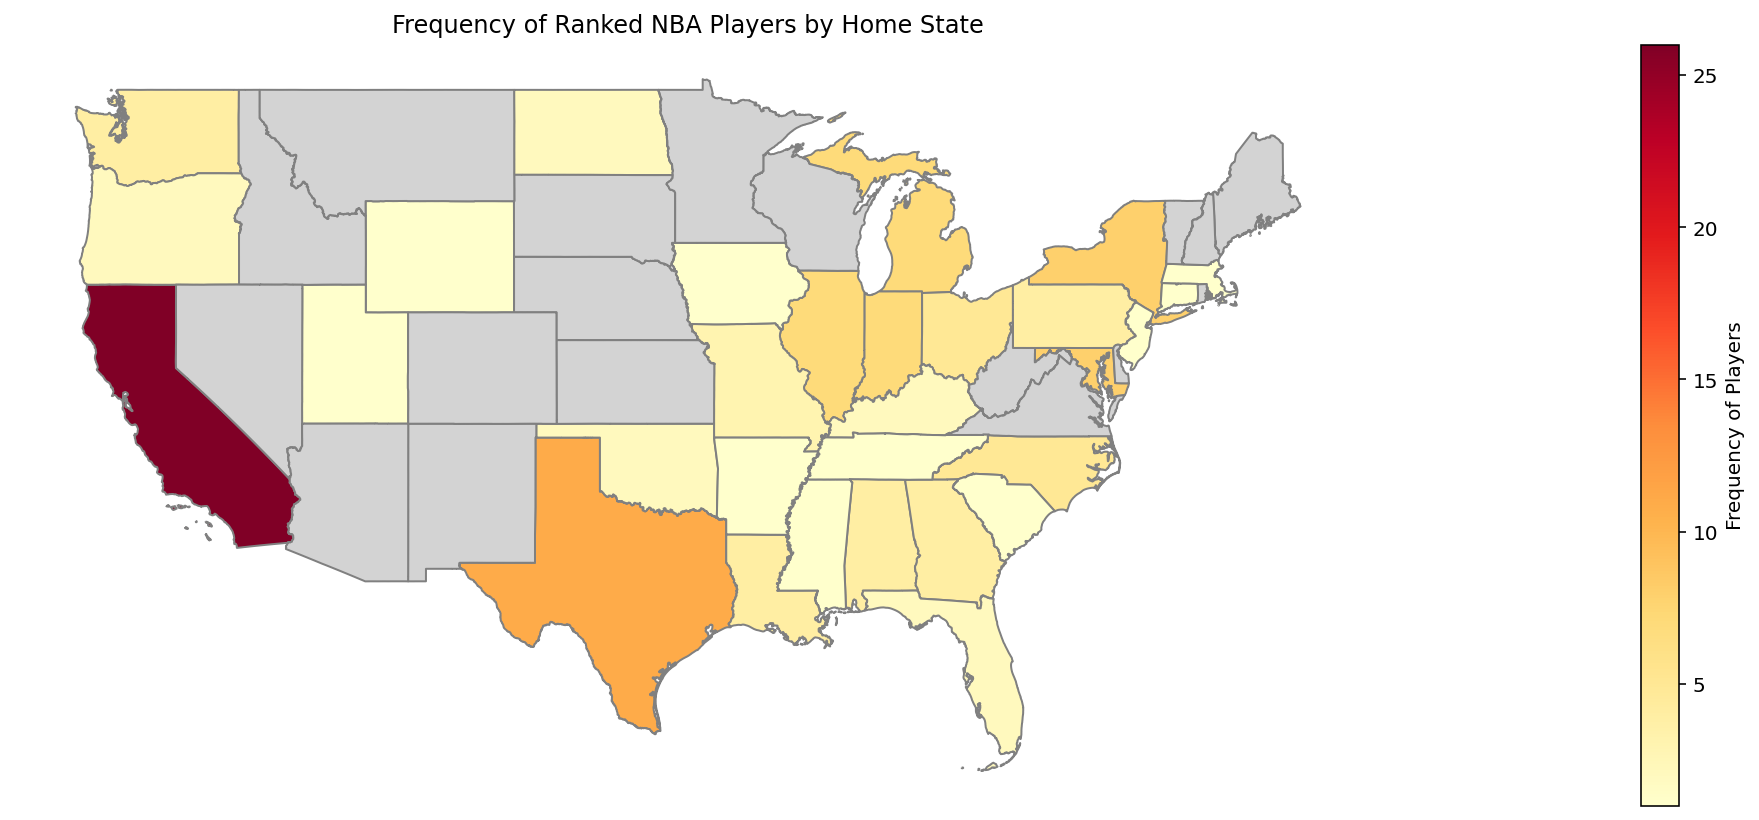

In [17]:
Map=gdf.plot(
     column="StateTotal",
     legend=True,
     figsize=(50, 7),
     cmap='YlOrRd',
     edgecolor='gray',
     legend_kwds={
         'label': "Frequency of Players"},
     missing_kwds={
         "color": "lightgrey",
         "label": "Missing values",
     },
 );
Map.set_title('Frequency of Ranked NBA Players by Home State')
Map.set_axis_off();
Map.figure.savefig('NBA_USplayers.pdf')

This plot displays the frequency of ranked NBA players by their home state, where a darker state color indicates a higher number of ranked players were born there, and gray states have no data.

My data set included the names and ranks of the top 176 ranked NBA players, as well as their home state. I decided that the best way to visualize the frequency of players by state would be to use a choropleth map. I merged my first dataset with a geopandas dataframe of US states to make the map. The US dataframe included US territories like Guam and the US Virgin Islands. I decided not to include those since there were no players from any of the territories. I also decided not to include Alaska or Hawaii for the same reason. Mainland states with no data are the color gray, and this clearly represents there is no data because the legend on the side displays the colors for states that have players from there. 